# Predicting Breast Cancer using Machine Learning

* **Exploratory data analysis (EDA)**
* **Model training**
* **Model evaluation**
* **Model comparison**
* **Model fine-tuning**
* **Feature importance**
* **Cross-validation**

## 1. Problem Definition
**binary classification**: whether a patient has benign or malignant type of breast cancer.

## 2. Data
https://www.kaggle.com/cherngs/heart-disease-cleveland-uci

## 3. Evaluation
Accuracy, Precision, Recall, Balanced accuracy. It may change during the work.

## 4. Variables -- Data dictionary
Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image.

1. ID number
2. Diagnosis (M = malignant, B = benign)
    - A benign tumor has distinct, smooth, regular borders. A benign tumor can become quite large, but it will not invade nearby tissue or spread to other parts of your body.
    - A malignant tumor has irregular borders and grows faster than a benign  tumor. A malignant tumor can also spread to other parts of your body.
3. radius (mean of distances from center to points on the perimeter)
4. texture (standard deviation of gray-scale values)
5. perimeter
6. area
7. smoothness (local variation in radius lengths)
8. compactness (perimeter^2 / area - 1.0)
9. concavity (severity of concave portions of the contour)
10. concave points (number of concave portions of the contour)
11. symmetry
12. fractal dimension ("coastline approximation" - 1)

**Notes** We'll use the following libraries

* [pandas](https://pandas.pydata.org/) for data analysis.
* [NumPy](https://numpy.org/) for numerical operations.
* [Matplotlib](https://matplotlib.org/) for plotting or data visualization.
* [seaborn](https://seaborn.pydata.org/) for plotting or data visualization.
* [Scikit-Learn](https://scikit-learn.org/stable/) for machine learning modelling and evaluation.
* [Cheat-sheet](https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html) for choosing the right models.

References:
  - Feature Selection and Data Visualization by kanncaa1 
https://www.kaggle.com/code/kanncaa1/feature-selection-and-data-visualization
  - 07_end-to-end_workflow by Szekeres Béla

In [ ]:
# Regular EDA and plotting libraries
import numpy as np # np is short for numpy
import pandas as pd # pandas is so commonly used, it's shortened to pd
import matplotlib.pyplot as plt
import seaborn as sns # seaborn gets shortened to sns

# We want our plots to appear in the notebook
%matplotlib inline 

## Models
from sklearn.ensemble import RandomForestClassifier # for Random Forest Classifier
from sklearn.neighbors import KNeighborsClassifier # for k nearest neighbors
from sklearn.svm import SVC # for Support Vector Machine
from sklearn.linear_model import LogisticRegression

from sklearn import preprocessing

## Model evaluators
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve

## Disable warnings
import warnings
warnings.filterwarnings("ignore")

In [ ]:
breast_cancer_df = pd.read_csv("https://raw.githubusercontent.com/kmark17/ML_project_breast_cancer/main/data.csv")
breast_cancer_df.shape

(569, 33)

# EDA - exploratory data analysis - Data exploration

In [ ]:
# The mean, standard error and "worst" or largest (mean of the three largest values) of these features were computed for each image,
# resulting in 30 features. For instance, field 3 is Mean Radius, field 13 is Radius SE, field 23 is Worst Radius.

breast_cancer_df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [ ]:
# Missing attribute values: none

breast_cancer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [ ]:
# Before starting working on the model, first, the columns that cannot be used for ML have to be removed.
# The "id" column is just a unique identifier of the record so we should remove it. The "Unnamed: 32" feature
# includes NaN values so we don't need it either. The "diagnoses" column will be our target variable (the label),
# so I drop it too from the dataset. However, I will need it so I save it to another variable.

diagnosis = breast_cancer_df['diagnosis']
breast_cancer_df.drop(["id", "diagnosis", "Unnamed: 32"],axis=1,inplace=True)

In [ ]:
breast_cancer_df.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


Text(0, 0.5, 'Amount')

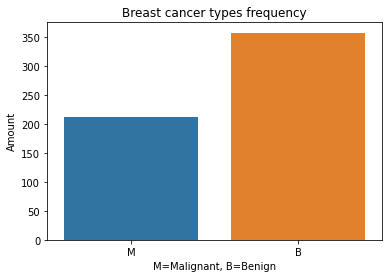

In [ ]:
# Frequency of tumour types

sns.countplot(diagnosis)
B, M = diagnosis.value_counts()

plt.title("Breast cancer types frequency")
plt.xlabel("M=Malignant, B=Benign")
plt.ylabel("Amount")

## Feature selection

Feature selection is a vital part of the process of setting up a model. Whenever we explore the data, we have to unravel underlying correlations between features.

Thus, feautre selection improves the machine learning process and increases the predictive power of machine learning algorithms by selecting the most important variables and eliminating redundant and irrelevant features. In oder words, it reduces the computation time, and facilitates an enhanced understanding for the learning model or data.

For visualization I will use:


*   Violin plot:
      - shows the distribution of quantitative data across several levels of one (or more) categorical variables such that those distributions can be compared.
*   Heatmap:
    - shows the correlation of features with shades of a colour.



In [ ]:
# Setting up the data for visualization

y = diagnosis
x = breast_cancer_df

# standardization ( (x - mean) / standard deviation )
x_standardized = (x - x.mean()) / (x.std())

### Group Mean

In [ ]:
# Selecting the first 10 features

x = pd.concat([y,pd.DataFrame(x_standardized).iloc[:,0:10]],axis=1)
x = pd.melt(x,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

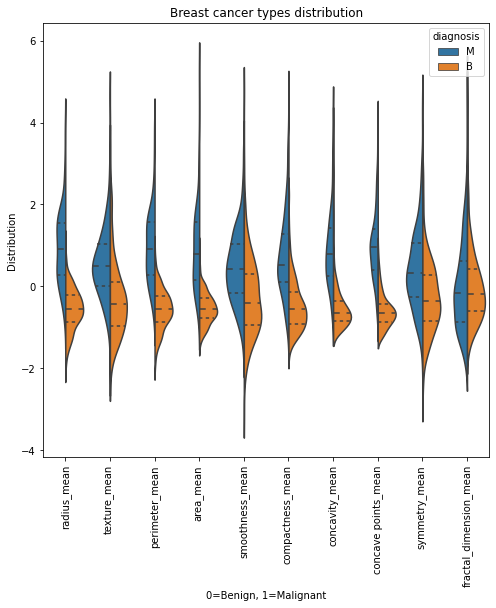

In [ ]:
# Observation: Violin plot shows us the distribution of Benign and Malignant types of breast cancer. The more seperated the median of the two cancer type, the better they are for classification.
# For example radius_mean, perimeter_mean and area_mean etc. are seperated nicely, on the other hand, they look similar so this already hints that they are correlated with each other so it might be worth
# using only one of them to avoid multi colinearity.

plt.figure(figsize=(8,8))
sns.violinplot(x="features", y="value", hue="diagnosis", data=x, split=True, inner="quart")
plt.title("Breast cancer types distribution")
plt.xlabel("0=Benign, 1=Malignant")
plt.ylabel("Distribution")
plt.xticks(rotation=90)

### Group Standard Error (SE)

In [ ]:
# Selecting the second 10 features

x = pd.concat([y,pd.DataFrame(x_standardized).iloc[:,10:20]],axis=1)
x = pd.melt(x,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

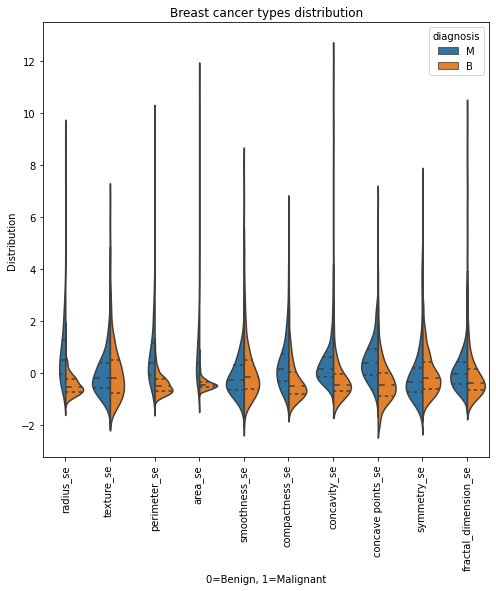

In [ ]:
# Observation: At first glimpse, there are no similar features for the standard error group so I will investigate this using a heatmap, so we can see their correlation
# as a number.

plt.figure(figsize=(8,8))
sns.violinplot(x="features", y="value", hue="diagnosis", data=x, split=True, inner="quart")
plt.title("Breast cancer types distribution")
plt.xlabel("0=Benign, 1=Malignant")
plt.ylabel("Distribution")
plt.xticks(rotation=90)

### Group Worst

In [ ]:
# Selecting the third 10 features

x = pd.concat([y,pd.DataFrame(x_standardized).iloc[:,20:31]],axis=1)
x = pd.melt(x,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

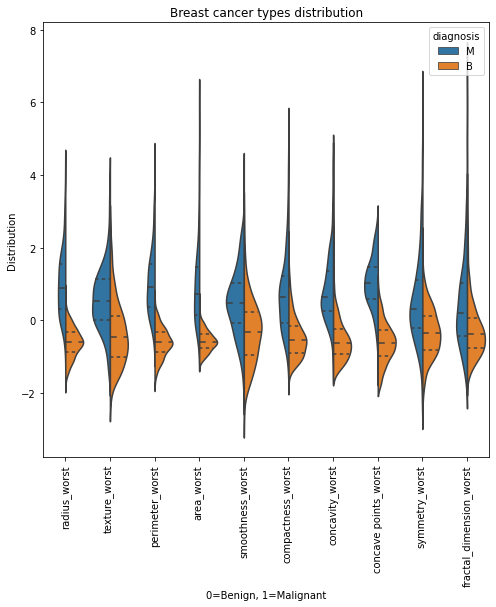

In [ ]:
# Observation: For the worst group, there are couple of similiar features, for example radius_wors and perimeter_worst, symmetry_worst and fractal_dimension_worst.
# Again, heatmap will help to decide whether they are correlated or not.

plt.figure(figsize=(8,8))
sns.violinplot(x="features", y="value", hue="diagnosis", data=x, split=True, inner="quart")
plt.title("Breast cancer types distribution")
plt.xlabel("0=Benign, 1=Malignant")
plt.ylabel("Distribution")
plt.xticks(rotation=90)

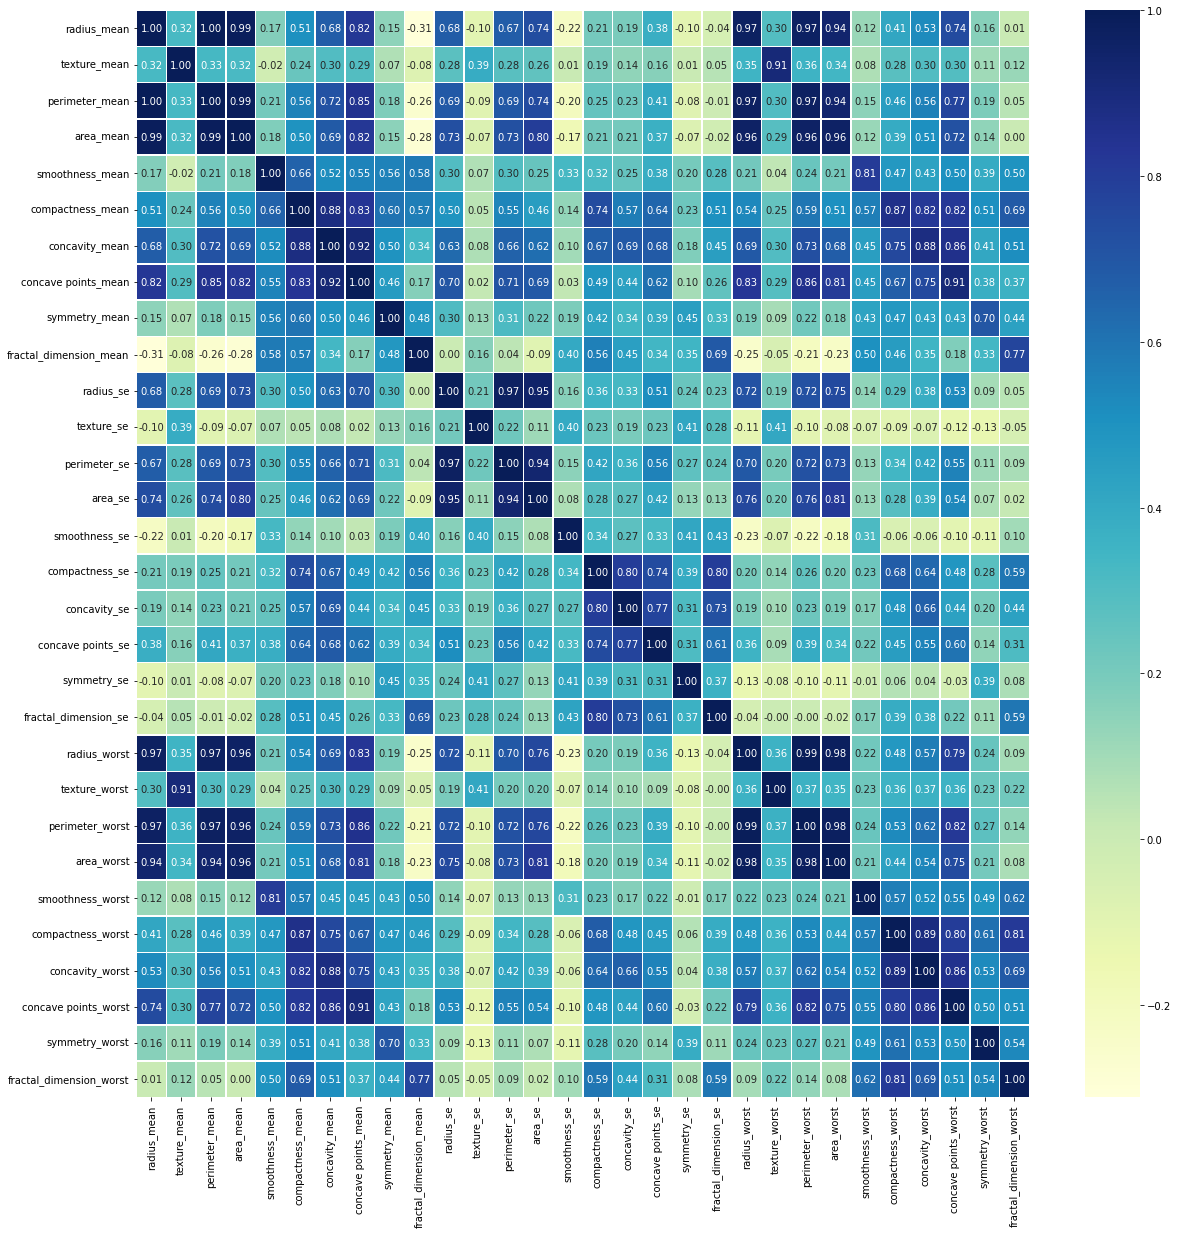

In [ ]:
# Observation: As the violin plots suggested, radius, perimeter and area are correlated (which makes sense) so I will use only area for all the groups.
# Same with concave points, compactness and concavity, I will use only concavity.
# texture_mean and texture_worst are also correlated so I will use only texture_mean.
# area_mean and area_worst are correlated as well, I will choose area_mean.

corr_matrix = breast_cancer_df.corr()
plt.figure(figsize=(20,20))
sns.heatmap(corr_matrix,
            annot=True,
            linewidths=0.5,
            fmt = ".2f",
            cmap ="YlGnBu")

# Modeling

In [ ]:
breast_cancer_df.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
# Dropping the correlated features.

drop_list = ['radius_mean','perimeter_mean','radius_se','perimeter_se','radius_worst','perimeter_worst','compactness_mean','concave points_mean','compactness_se','concave points_se','compactness_worst','concave points_worst','texture_worst', 'area_worst']
X = breast_cancer_df.drop(drop_list, axis = 1 )

# As the "diagnosis" column's datatype is object, we can map it to integer value (0 or 1).
y = diagnosis.map({'M':1,'B':0})

In [ ]:
# Features

X.head()

,texture_mean,area_mean,smoothness_mean,concavity_mean,symmetry_mean,fractal_dimension_mean,texture_se,area_se,smoothness_se,concavity_se,symmetry_se,fractal_dimension_se,smoothness_worst,concavity_worst,symmetry_worst,fractal_dimension_worst
0,10.38,1001.0,0.11840,0.3001,0.2419,0.07871,0.9053,153.40,0.006399,0.05373,0.03003,0.006193,0.1622,0.7119,0.4601,0.11890
1,17.77,1326.0,0.08474,0.0869,0.1812,0.05667,0.7339,74.08,0.005225,0.01860,0.01389,0.003532,0.1238,0.2416,0.2750,0.08902
2,21.25,1203.0,0.10960,0.1974,0.2069,0.05999,0.7869,94.03,0.006150,0.03832,0.02250,0.004571,0.1444,0.4504,0.3613,0.08758
3,20.38,386.1,0.14250,0.2414,0.2597,0.09744,1.1560,27.23,0.009110,0.05661,0.05963,0.009208,0.2098,0.6869,0.6638,0.17300
4,14.34,1297.0,0.10030,0.1980,0.1809,0.05883,0.7813,94.44,0.011490,0.05688,0.01756,0.005115,0.1374,0.4000,0.2364,0.07678


In [ ]:
# Target

y

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: diagnosis, Length: 569, dtype: int64

In [ ]:
# Spliting the dataset into train and test set and setting the seed to get the same result for every run.

np.random.seed(42)

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3)

In [ ]:
X_train.head()

,texture_mean,area_mean,smoothness_mean,concavity_mean,symmetry_mean,fractal_dimension_mean,texture_se,area_se,smoothness_se,concavity_se,symmetry_se,fractal_dimension_se,smoothness_worst,concavity_worst,symmetry_worst,fractal_dimension_worst
149,17.91,585.0,0.07944,0.02881,0.1473,0.05580,0.7574,21.47,0.002838,0.01780,0.01329,0.001976,0.09711,0.1564,0.2350,0.07014
124,16.39,553.5,0.07115,0.08092,0.1422,0.05823,1.1400,14.66,0.005919,0.04957,0.01208,0.004076,0.10250,0.3308,0.2048,0.07628
421,13.98,656.1,0.10310,0.14500,0.2086,0.07406,1.5110,49.45,0.009976,0.05278,0.02653,0.005444,0.13120,0.3219,0.2827,0.09208
195,16.33,516.4,0.07941,0.03873,0.1829,0.05667,0.9086,15.75,0.005298,0.02321,0.01853,0.002152,0.10970,0.1764,0.3024,0.06949
545,23.23,573.2,0.09246,0.02974,0.1664,0.05801,1.3360,31.24,0.005868,0.02021,0.02087,0.002583,0.12160,0.1049,0.2642,0.06953


In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((398, 16), (171, 16), (398,), (171,))

## Choosing models

1. Random Forest
2. KNN
3. Logistic regression

In [ ]:
models = {"Random Forest": RandomForestClassifier(),
          "KNN": KNeighborsClassifier(),
          "Logistic regression": LogisticRegression()}

In [ ]:
# Fits and evaulates the given models.
# X_train : training data
# X_test : testing data
# y_train : training labels
# y_test : testing labels

def fit_and_score(models,X_train,X_test,y_train,y_test):
    
    np.random.seed(32)
    
    # To keep model scores
    model_scores = {}
    
    # Loop through models
    for name, model in models.items():
        # Fit the model
        model.fit(X_train,y_train)
        # Evaluate it
        score = model.score(X_test,y_test)
        model_scores[name] = score
    return model_scores

In [ ]:
# Scores of the models.

model_scores = fit_and_score(models = models,
                             X_train = X_train,
                             X_test = X_test,
                             y_train = y_train,
                             y_test = y_test)
model_scores

{'KNN': 0.9064327485380117,
 'Logistic regression': 0.9473684210526315,
 'Random Forest': 0.9649122807017544}

## Model comparison

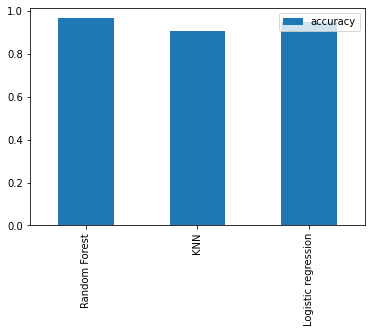

In [ ]:
# Model scores visualization.

model_compare = pd.DataFrame(model_scores, index=["accuracy"])
model_compare.T.plot.bar()

# Hyperparameter tuning

1. Tune hyperparameters
2. CV
3. ROC
4. Confusion
5. Precision, Recall, F1
6. Feature importances

In [ ]:
# Create a list for the train scores
train_scores = []

# Create a list for the test scores
test_scores = []

# The neighbor numbers
neighbors = np.arange(1,21)

# Instantiate the knn classifier
knn = KNeighborsClassifier()

# Loop through the different neighbor values
for i in neighbors:
    # Set the parametes
    knn.set_params(n_neighbors=i)
    
    # Fit the model
    knn.fit(X_train,y_train)
    
    # Training scores
    train_score = knn.score(X_train,y_train)
    
    # Testing scores
    test_score = knn.score(X_test,y_test)
    
    # Saving them
    train_scores.append(train_score)
    test_scores.append(test_score)
    

In [ ]:
train_scores, test_scores

([1.0,
  0.914572864321608,
  0.9221105527638191,
  0.8994974874371859,
  0.8969849246231156,
  0.8994974874371859,
  0.8969849246231156,
  0.8844221105527639,
  0.8894472361809045,
  0.8844221105527639,
  0.8844221105527639,
  0.8844221105527639,
  0.8844221105527639,
  0.8844221105527639,
  0.8844221105527639,
  0.8844221105527639,
  0.8844221105527639,
  0.8793969849246231,
  0.8844221105527639,
  0.8844221105527639],
 [0.8713450292397661,
  0.8888888888888888,
  0.9122807017543859,
  0.9064327485380117,
  0.9064327485380117,
  0.9181286549707602,
  0.9239766081871345,
  0.9122807017543859,
  0.9005847953216374,
  0.9122807017543859,
  0.9064327485380117,
  0.9064327485380117,
  0.9122807017543859,
  0.9122807017543859,
  0.9181286549707602,
  0.9122807017543859,
  0.9181286549707602,
  0.9064327485380117,
  0.9239766081871345,
  0.9064327485380117])

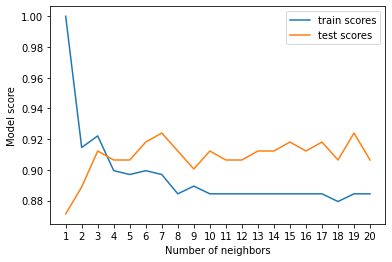

In [ ]:
# Observation: the best score was produced with 7 neighbors.

plt.plot(neighbors, train_scores, label="train scores")
plt.plot(neighbors, test_scores, label="test scores")
plt.xticks(np.arange(1,21,1))
plt.xlabel("Number of neighbors")
plt.ylabel("Model score")
plt.legend()

## Tuning models with RandomizedSearchCV

In [ ]:
# Grid for logistic regression
log_reg_grid = {"C": np.logspace(-4,4,40),
                "solver": ["liblinear"]}

# Grid for random forest
rf_grid = {"n_estimators": np.arange(10,1000,50),
           "max_depth": [2,3,5],
           "min_samples_split": np.arange(2,10,1),
           "min_samples_leaf": np.arange(1,10,1)}

In [ ]:
np.random.seed(142)

rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions=log_reg_grid,
                                cv=5,
                                n_iter=20,
                                refit=True,
                                verbose=True)
rs_log_reg.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 1.60371874e-04, 2.57191381e-04, 4.12462638e-04,
       6.61474064e-04, 1.06081836e-03, 1.70125428e-03, 2.72833338e-03,
       4.37547938e-03, 7.01703829e-03, 1.12533558e-02, 1.80472177e-02,
       2.89426612e-02, 4.64158883e-02, 7.44380301e-02, 1.19377664e-01,
       1.91448198e-0...652287e-01,
       1.26638017e+00, 2.03091762e+00, 3.25702066e+00, 5.22334507e+00,
       8.37677640e+00, 1.34339933e+01, 2.15443469e+01, 3.45510729e+01,
       5.54102033e+01, 8.88623816e+01, 1.42510267e+02, 2.28546386e+02,
       3.66524124e+02, 5.87801607e+02, 9.42668455e+02, 1.51177507e+03,
       2.42446202e+03, 3.88815518e+03, 6.23550734e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [ ]:
rs_log_reg.best_params_

{'C': 942.6684551178854, 'solver': 'liblinear'}

In [ ]:
rs_log_reg.score(X_test,y_test)

0.9766081871345029

In [ ]:
np.random.seed(142)

rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                            param_distributions=rf_grid,
                            cv=5,
                            n_iter=50,
                            refit=True,
                            verbose=True)
rs_rf.fit(X_train,y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=50,
                   param_distributions={'max_depth': [2, 3, 5],
                                        'min_samples_leaf': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
                                        'min_samples_split': array([2, 3, 4, 5, 6, 7, 8, 9]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [ ]:
rs_rf.best_params_

{'max_depth': 5,
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 360}

In [ ]:
rs_rf.score(X_test,y_test)

0.9590643274853801

## Evaluation

* roc curve and auc score - plot_roc_curve()
* confusion matrx - confusion_matrix()
* classification report - classification_report()
* precision, recall, f1-score - precision_score(), recall_score(), f1_score()

In [ ]:
# Make some predictions

y_preds = rs_log_reg.predict(X_test)

In [ ]:
# Predictions

y_preds

array([0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0])

In [ ]:
np.array(y_test)

array([0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0])

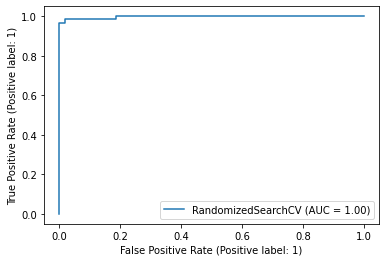

In [ ]:
plot_roc_curve(rs_log_reg,X_test,y_test)

In [ ]:
print(confusion_matrix(y_test,y_preds))

[[105   3]
 [  1  62]]


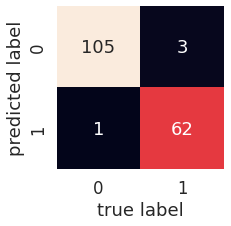

In [ ]:
import seaborn as sns
sns.set(font_scale=1.5)

def plot_conf_mat(y_test,y_preds):
    
    # Plots the confusion matrix
    
    fig, ax = plt.subplots(figsize=(3,3))
    ax = sns.heatmap(confusion_matrix(y_test,y_preds),
                         annot=True,
                         fmt='g',
                         cbar=False)
    plt.xlabel("true label")
    plt.ylabel("predicted label")
    
plot_conf_mat(y_test,y_preds)

In [ ]:
# show the classification report
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98       108
           1       0.95      0.98      0.97        63

    accuracy                           0.98       171
   macro avg       0.97      0.98      0.98       171
weighted avg       0.98      0.98      0.98       171



### Feature importance

In [ ]:
clf = LogisticRegression()
clf.fit(X_train,y_train)

LogisticRegression()

In [ ]:
clf.coef_

array([[ 0.28686499,  0.00546774, -0.03499226,  1.04108823, -0.23028379,
        -0.18846873, -1.39511633,  0.09441172, -0.02415732, -0.31947103,
        -0.07593732, -0.03654807,  0.31546483,  3.80546665,  0.99172376,
         0.09282132]])

In [ ]:
features_dict = dict(zip(breast_cancer_df.columns,list(clf.coef_[0])))
features_dict

{'area_mean': 1.041088228713252,
 'area_se': 3.805466654094372,
 'compactness_mean': -0.18846872644203064,
 'compactness_se': 0.09282131519033966,
 'concave points_mean': 0.09441171893700398,
 'concavity_mean': -1.3951163319125235,
 'fractal_dimension_mean': -0.31947102934583194,
 'perimeter_mean': -0.03499225975972405,
 'perimeter_se': 0.31546483100194483,
 'radius_mean': 0.28686499416447064,
 'radius_se': -0.07593731871337456,
 'smoothness_mean': -0.2302837897983055,
 'smoothness_se': 0.9917237638534756,
 'symmetry_mean': -0.02415731719362372,
 'texture_mean': 0.005467735019759938,
 'texture_se': -0.03654806715507689}

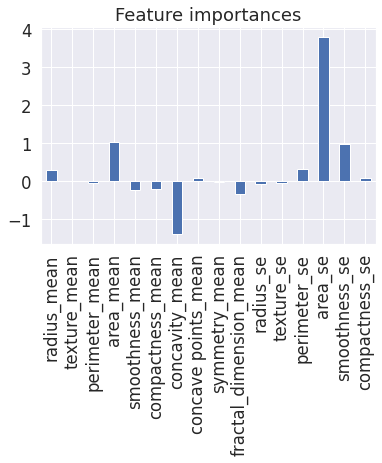

In [ ]:
# Visualize the feature importances

features_df = pd.DataFrame(features_dict,index=[0])
features_df.T.plot.bar(title="Feature importances",legend=False)